# Лабораторная работа №1
## Решение краевых задач методом разностных аппроксимаций
### Вариант 19
*Задание.* Составить разностную схему и получить численное решение краевой задачи с точностью $10^{-3}$.

$y''+(1+x^2)y=-1, -1\le x\le -1, y(-1)=y(1)=0$

$ay''+(1+bx^2)=-1, -1\le x\le -1, y(-1)=y(1)=0, a=sin(19), b=cos(19)$

In [138]:
import numpy as np
import scipy as sp
from scipy import sparse
import matplotlib.pyplot as plt

In [139]:
K = 19

In [140]:
def solve_de(px, fx, a, b, h=0.001):
    n = int((b - a) / h)
    X = np.linspace(a, b, n - 1)
    P = px(X)
    data = np.array([[1] * (n - 1), [-(h * h * P[i] + 2) for i in range(n - 1)], [1] * (n - 1)])
    offsets = [-1, 0, 1]
    M = sparse.dia_matrix((data, offsets), shape=(n - 1, n - 1)).toarray()
    F = fx(X) * h * h
    solution = np.linalg.solve(M, F)
    return solution

In [141]:
def px1(x):
    return - 1 - x * x

In [142]:
def fx1(x):
    return -1 + (x - x);

In [143]:
sol = solve_de(px1, fx1, -1, 1)

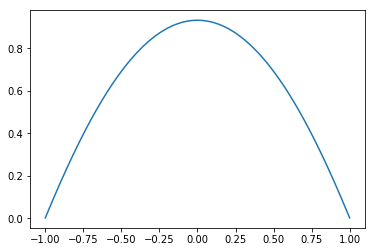

In [144]:
X = np.linspace(a, b, n - 1)
plt.plot(X, sol)

In [145]:
def px2(x):
    return - (1 + np.cos(K) * x * x) / np.sin(K)

In [146]:
def fx2(x):
    return (x - x) - 1 / np.sin(K)

In [147]:
sol2 = solve_de(px2, fx2, -1, 1)

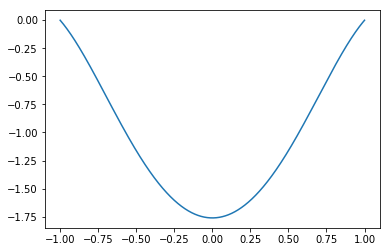

In [148]:
plt.plot(X, sol2)